# 可視化

## この章で扱うもの

- 前章で作った各種データを再利用
- グラフ化して閲覧
- データの関連度などを確認
- 日本語でグラフ表示を行う


## この章で取り扱う手順

- matplotlibで日本語を扱う
- 前章のデータを読み込む
- 各種グラフを表示
- データの関連度を見る


# Matplotlibで日本語化

環境によっては、フォントをキャッシュファイルが存在する場合があり、前もって削除し、Jupyter Notebookの再起動

```
$ rm ~/.matplotlib/fontList.py3k.cache
```

または

```
$ rm ~/.cache/matplotlib
```

以下を実行することで、キャッシュディレクトリの確認ができます。

```py
from matplotlib import get_cachedir
get_cachedir()
```


## 日本語フォントのダウンロード

https://github.com/adobe-fonts/source-han-code-jp/releases/tag/2.000R

今回は、Adobe社がオープンソースで提供しているフォントを使用しましす。

以下でフォントを読み込む方法もある。
```py
from matplotlib import font_manager
font = font_manager.FontProperties(fname='/Users/terada/Library/Fonts/SourceHanCodeJP-Regular.otf', size=14)
```

# 以下からは毎回実行

In [1]:
%matplotlib inline

グラフをNotebook内に表示するためのコマンド

In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import rcParams

matplotlib の初期設定を行うためにインポート

In [4]:
rcParams['font.sans-serif'] = "Source Han Code JP"
rcParams['font.weight'] = "regular"
rcParams['axes.titlesize'] = 15
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12

フォントを先程ダウンロードしたAdobe社提供の物を設定しています。

ここまでで、設定が完了します。

In [5]:
df = pd.DataFrame({'あ': [1, 2, 3], 'い': [1.5, 2.0, 2.5]})

In [6]:
df

,あ,い
0,1,1.5
1,2,2.0
2,3,2.5


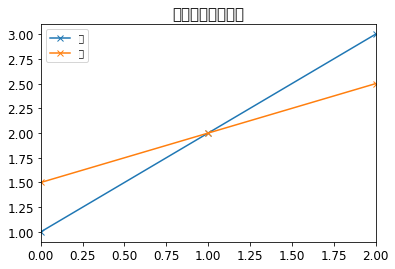

In [8]:
df.plot(title="サンプルのデータ", marker="x")

pandasのデータを直接グラフ化した。

# 前章のデータを読み込む

In [9]:
!ls 

1-opening.ipynb          9-ending.ipynb           df_influ.db
2-data-handling.ipynb    LICENSE                  df_influ2.db
3-visualization.ipynb    clf_rf.db                df_weather.db
4-machine-learning.ipynb data                     requirements.txt
5-prediction.ipynb       df.db


In [10]:
df_influ = pd.read_pickle("df_influ.db")

In [11]:
df_influ.head()

,報告数
2013-12-30,0.178571
2014-01-06,2.814815
2014-01-13,9.750000
2014-01-20,25.321428
2014-01-27,31.321428


In [12]:
df_influ.tail()

,報告数
2016-11-28,3.444444
2016-12-05,3.857143
2016-12-12,4.178571
2016-12-19,6.892857
2016-12-26,4.434783


In [13]:
df_influ.dtypes

報告数    float32
dtype: object

# 各種グラフを表示

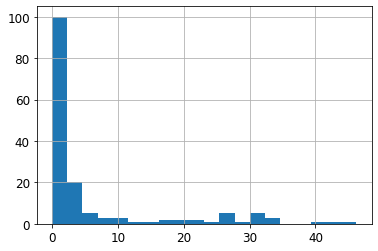

In [14]:
df_influ['報告数'].hist(bins=20)

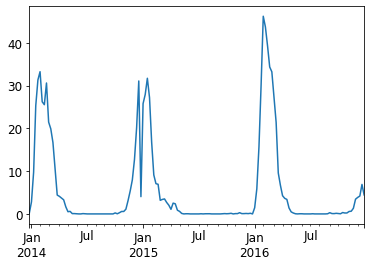

In [15]:
df_influ['報告数'].plot()

# データの関連度を見る

In [16]:
df_influ['報告数'].max()

46.21428680419922

In [17]:
df_influ.describe()

,報告数
count,157.000000
mean,5.675186
std,10.528645
min,0.000000
25%,0.000000
50%,0.222222
75%,4.250000
max,46.214287


# 報告数から「流行」「増加」を判断して新たなカラムに入れる

In [18]:
len(df_influ[df_influ['報告数'] > 10.])

27

In [19]:
df_influ["流行"] = df_influ['報告数'].apply(lambda x: 1 if x > 10. else 0)

報告数が10を超えたら、流行と定めました。

In [20]:
df_influ['増加'] = df_influ['報告数'].diff(periods=1) > 5

報告数が1週前より、5より大きく増えている時を、増加と定めました。

In [21]:
df_influ.shape

(157, 3)

In [22]:
df_influ.head()

,報告数,流行,増加
2013-12-30,0.178571,0,False
2014-01-06,2.814815,0,False
2014-01-13,9.750000,0,True
2014-01-20,25.321428,1,True
2014-01-27,31.321428,1,True


In [23]:
len(df_influ[df_influ['増加']==True])

10

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aca3da0>,
      dtype=object)

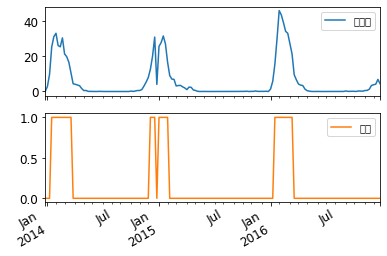

In [25]:
df_influ.plot(subplots=True)

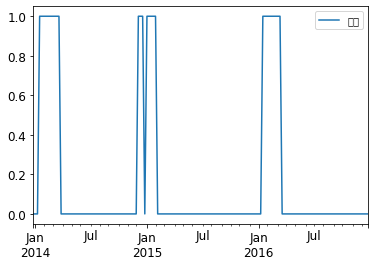

In [26]:
df_influ[["流行", "増加" ]].plot()

In [27]:
df_influ.describe()

,報告数,流行
count,157.000000,157.000000
mean,5.675186,0.171975
std,10.528645,0.378566
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.222222,0.000000
75%,4.250000,0.000000
max,46.214287,1.000000


In [28]:
df_influ.to_pickle("df_influ2.db")

In [29]:
df_weather = pd.read_pickle("df_weather.db")

In [30]:
df = pd.concat([df_influ, df_weather], axis=1)

In [31]:
df.head()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
2013-12-30,0.178571,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,9.8,13.7,3.9,54.0,37.0,1005.3,0.0,9.2,5.3
2014-01-02,NaN,NaN,NaN,8.0,12.9,4.4,41.0,26.0,1011.3,0.0,9.1,3.0
2014-01-03,NaN,NaN,NaN,5.9,9.9,2.7,43.0,32.0,1014.9,0.0,4.1,1.6
2014-01-04,NaN,NaN,NaN,6.7,11.5,2.1,47.0,29.0,1009.5,0.0,5.9,2.4


In [32]:
df["報告数"] = df["報告数"].fillna(method='ffill').astype(np.float32)

In [33]:
df[["流行", "増加"]] = df[["流行", "増加"]].fillna(method='ffill').astype(np.int32)

In [34]:
df.head(20)

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
2013-12-30,0.178571,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,0.178571,0,0,9.8,13.7,3.9,54.0,37.0,1005.3,0.0,9.2,5.3
2014-01-02,0.178571,0,0,8.0,12.9,4.4,41.0,26.0,1011.3,0.0,9.1,3.0
2014-01-03,0.178571,0,0,5.9,9.9,2.7,43.0,32.0,1014.9,0.0,4.1,1.6
2014-01-04,0.178571,0,0,6.7,11.5,2.1,47.0,29.0,1009.5,0.0,5.9,2.4
2014-01-05,0.178571,0,0,4.4,6.9,2.3,40.0,28.0,1016.6,0.0,1.1,2.5
2014-01-06,2.814815,0,0,4.9,10.4,0.8,36.0,19.0,1021.4,0.0,9.4,4.5
2014-01-07,2.814815,0,0,5.0,8.7,0.2,46.0,30.0,1025.4,0.0,6.5,2.0
2014-01-08,2.814815,0,0,7.8,13.6,2.5,66.0,39.0,1014.4,18.0,2.5,2.5
2014-01-09,2.814815,0,0,6.5,9.7,3.1,77.0,39.0,1007.1,10.0,0.6,3.1


In [35]:
df.tail()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
2017-04-26,4.434783,0,0,17.0,19.7,14.2,69.0,53.0,1014.3,0.0,0.2,6.5
2017-04-27,4.434783,0,0,14.7,17.6,11.6,69.0,45.0,1004.9,6.5,2.6,4.5
2017-04-28,4.434783,0,0,16.0,20.1,12.7,62.0,31.0,1006.2,0.0,7.4,2.7
2017-04-29,4.434783,0,0,16.3,21.9,11.8,64.0,34.0,1005.7,0.0,12.1,3.5
2017-04-30,4.434783,0,0,18.0,23.2,12.1,57.0,31.0,1009.2,0.0,12.6,3.7


In [36]:
df = df.loc["2014-01-01":"2016-12-31", :]

In [37]:
df.shape

(1096, 12)

In [38]:
df.head()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
2014-01-01,0.178571,0,0,9.8,13.7,3.9,54.0,37.0,1005.3,0.0,9.2,5.3
2014-01-02,0.178571,0,0,8.0,12.9,4.4,41.0,26.0,1011.3,0.0,9.1,3.0
2014-01-03,0.178571,0,0,5.9,9.9,2.7,43.0,32.0,1014.9,0.0,4.1,1.6
2014-01-04,0.178571,0,0,6.7,11.5,2.1,47.0,29.0,1009.5,0.0,5.9,2.4
2014-01-05,0.178571,0,0,4.4,6.9,2.3,40.0,28.0,1016.6,0.0,1.1,2.5


In [39]:
df.tail()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
2016-12-27,4.434783,0,0,13.0,19.2,5.3,81.0,72.0,1002.4,5.0,0.1,7.3
2016-12-28,4.434783,0,0,6.8,10.2,3.8,40.0,25.0,1018.4,0.5,9.4,4.2
2016-12-29,4.434783,0,0,5.5,13.2,1.8,51.0,44.0,1017.0,0.0,5.3,2.3
2016-12-30,4.434783,0,0,6.3,10.2,2.6,35.0,20.0,1022.0,0.0,9.3,4.3
2016-12-31,4.434783,0,0,6.8,11.0,3.0,44.0,27.0,1023.1,0.0,9.2,1.6


In [40]:
df.describe()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,5.686351,0.172445,0.063869,16.655383,20.592701,13.362591,65.625000,46.821168,1013.482026,4.302464,5.478285,3.679745
std,10.511529,0.377939,0.244630,7.587327,7.730775,7.928433,15.949775,17.742320,7.014548,12.295895,4.177179,1.521424
min,0.000000,0.000000,0.000000,0.300000,3.000000,-1.600000,23.000000,11.000000,984.800000,0.000000,0.000000,1.500000
25%,0.000000,0.000000,0.000000,9.675000,13.700000,5.900000,54.000000,32.000000,1008.900000,0.000000,1.100000,2.700000
50%,0.222222,0.000000,0.000000,17.400000,21.400000,13.900000,68.000000,47.000000,1013.100000,0.000000,5.700000,3.300000
75%,4.250000,0.000000,0.000000,22.900000,26.725000,20.100000,78.000000,59.000000,1018.300000,1.625000,9.325000,4.200000
max,46.214287,1.000000,1.000000,31.100000,38.500000,27.800000,94.000000,91.000000,1032.100000,117.000000,13.700000,10.900000


In [41]:
df.corr()

,報告数,流行,増加,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
報告数,1.000000,0.920552,0.520279,-0.621247,-0.601432,-0.620529,-0.350081,-0.317306,0.246185,-0.040625,0.029529,-0.002546
流行,0.920552,1.000000,0.503057,-0.550473,-0.534462,-0.547747,-0.319530,-0.289164,0.199177,-0.017523,0.029273,0.014974
増加,0.520279,0.503057,1.000000,-0.345242,-0.337586,-0.342774,-0.254595,-0.209038,0.100138,-0.039825,0.040860,-0.008053
平均気温(℃),-0.621247,-0.550473,-0.345242,1.000000,0.985625,0.987361,0.524156,0.444199,-0.484233,0.041200,0.058395,0.152294
最高気温(℃),-0.601432,-0.534462,-0.337586,0.985625,1.000000,0.954889,0.461003,0.352113,-0.475753,0.000018,0.153385,0.148608
最低気温(℃),-0.620529,-0.547747,-0.342774,0.987361,0.954889,1.000000,0.571685,0.508700,-0.489292,0.077083,-0.031358,0.145792
平均湿度(％),-0.350081,-0.319530,-0.254595,0.524156,0.461003,0.571685,1.000000,0.919353,-0.350638,0.402555,-0.571643,-0.105850
最小相対湿度(％),-0.317306,-0.289164,-0.209038,0.444199,0.352113,0.508700,0.919353,1.000000,-0.268709,0.398044,-0.633289,-0.084585
平均現地気圧(hPa),0.246185,0.199177,0.100138,-0.484233,-0.475753,-0.489292,-0.350638,-0.268709,1.000000,-0.225940,0.097372,-0.389218
降水量の合計(mm),-0.040625,-0.017523,-0.039825,0.041200,0.000018,0.077083,0.402555,0.398044,-0.225940,1.000000,-0.374244,0.095471


In [42]:
from pandas.plotting import scatter_matrix

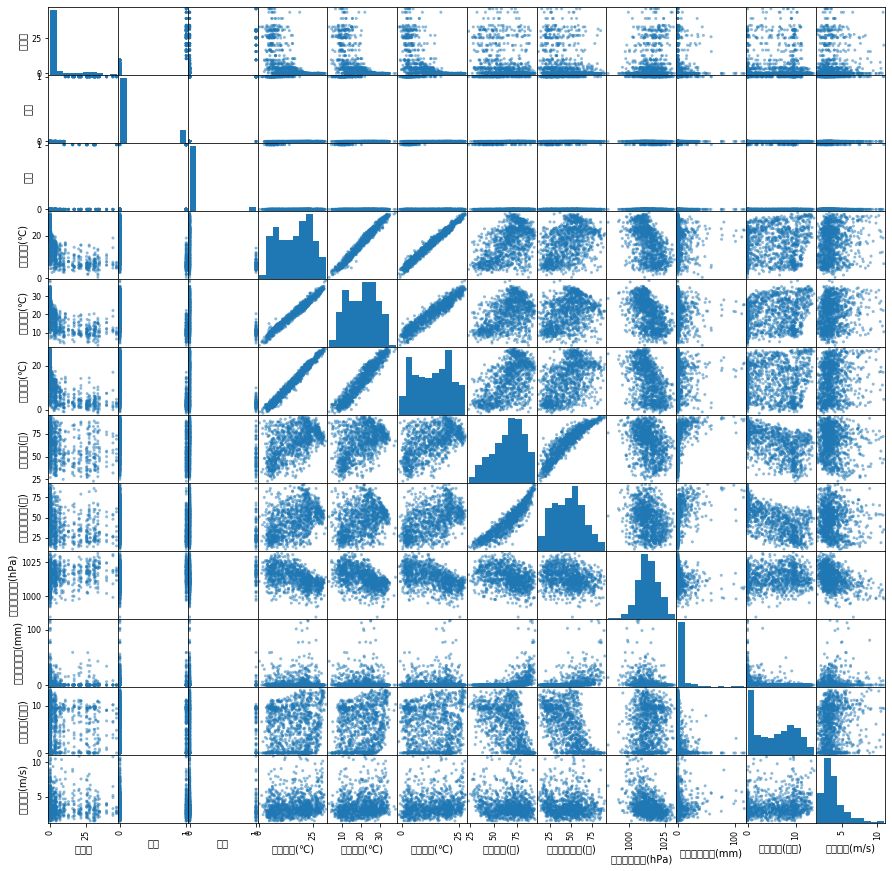

In [45]:
_ = scatter_matrix(df, figsize=(15, 15))

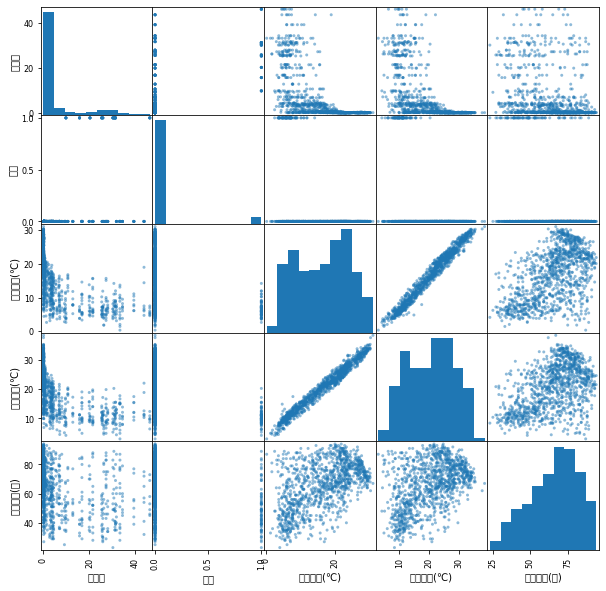

In [46]:
_ = scatter_matrix(df[["報告数", "増加", "平均気温(℃)", "最高気温(℃)","平均湿度(％)"]], figsize=(10, 10))

In [47]:
df[["報告数", "増加", "平均気温(℃)", "最高気温(℃)","平均湿度(％)"]].corr()

,報告数,増加,平均気温(℃),最高気温(℃),平均湿度(％)
報告数,1.000000,0.520279,-0.621247,-0.601432,-0.350081
増加,0.520279,1.000000,-0.345242,-0.337586,-0.254595
平均気温(℃),-0.621247,-0.345242,1.000000,0.985625,0.524156
最高気温(℃),-0.601432,-0.337586,0.985625,1.000000,0.461003
平均湿度(％),-0.350081,-0.254595,0.524156,0.461003,1.000000


In [48]:
df.to_pickle("df.db")